Regression analysis : relationship b/w a set of independent variables and a dependent variable

Dependent variable is: <br />
(1) continuous<br />
(2) categorical<br />
(3) count<br />

---

## (1) Regression Analysis with Continuous Dependent Variables

Continuous variable: measurement on a continuous scale (weight, time, length, &c.)

### Linear regression / ordinary least squares (OLS)
"produces the fitted line that minimizes the sum of the squared differences between the data points and the line." => understand mean change in a dependent variable given a one-unit change in each independent variable.<br />
estimates parameters by minimising the sum of the squared errors (SSE)<br />
special options: fitted plot lines; stepwise regression and best subsets regression

Weaknesses of OLS: sensitivity to outliers and multicollinearity; prone to overfitting

Variants of OLS: <br />
* Ridge regression : use by severe multicollinearity, helps prevent overfitting
* Lasso regression : variable selection to increase prediction accuracy by identifying a simpler model
* Partial least squares (PLS) regression : few observations compared to number of independent variables, or if independents are highly correlated

### Nonlinear Regression
requires continuous dependent variable, flexible to fitting curves

Estimates the parameters by minimising SSE; uses iterative algorithm

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

# called to counteract dark-mode Jupyter from swallowing axes &c.
plt.style.use('seaborn-whitegrid')

In [45]:
hourly_core = pd.read_csv('data/mod_data/hour_mod.csv')

In [46]:
hourly_core.columns

Index(['date_time', 'instant', 'date_day', 'season', 'year', 'month', 'hour',
       'is_holiday', 'weekday', 'is_workday', 'weather', 'temp', 'temp_feel',
       'humidity', 'windspeed', 'casual', 'registered', 'total_riders',
       'hour_time', 'season_name', 'weekday_name', 'weather_desc', 'daytime',
       'daytime_code', 'cold', 'hot', 'muggy'],
      dtype='object')

In [47]:
hourly_core['date_day'] = pd.to_datetime(hourly_core['date_day'], format='%Y-%m-%d')
hourly_core['day'] = hourly_core.date_day.dt.day
#hourly_core = hourly_core.drop(columns=['instant', 'date_day', 'season_name', 'weekday_name', 'daytime', 
#                            'hour_time', 'weather_desc'])

In [48]:
# Convert to 'category' data type

hourly_core['season_name']=hourly_core['season_name'].astype('category')
hourly_core['weather_desc']=hourly_core['weather_desc'].astype('category')
hourly_core['month']=hourly_core['month'].astype('category')
hourly_core['weekday_name']=hourly_core['weekday_name'].astype('category')
x={1:'jan', 2:'feb', 3:'mar', 4:'apr', 5:'may', 6:'jun', 7:'jul', 8:'aug', 9:'sep', 10:'oct', 11:'nov', 12:'dec'}
hourly_core['month']=hourly_core['month'].map(x)

In [49]:
hourly_core.columns

Index(['date_time', 'instant', 'date_day', 'season', 'year', 'month', 'hour',
       'is_holiday', 'weekday', 'is_workday', 'weather', 'temp', 'temp_feel',
       'humidity', 'windspeed', 'casual', 'registered', 'total_riders',
       'hour_time', 'season_name', 'weekday_name', 'weather_desc', 'daytime',
       'daytime_code', 'cold', 'hot', 'muggy', 'day'],
      dtype='object')

In [50]:
hourly_core = hourly_core.drop(columns=['instant', 'date_day', 'season', 'weekday', 'weather', 'hour_time', 'daytime', 'daytime_code',
                            'cold', 'hot', 'muggy'])

In [51]:
hourly_core.head(2)

,date_time,year,month,hour,is_holiday,is_workday,temp,temp_feel,humidity,windspeed,casual,registered,total_riders,season_name,weekday_name,weather_desc,day
0,2011-01-01 00:00:00,2011,jan,0,0,0,3.28,3.0014,81.0,0.0,3,13,16,winter,saturday,clear,1
1,2011-01-01 01:00:00,2011,jan,1,0,0,2.34,1.9982,80.0,0.0,8,32,40,winter,saturday,clear,1


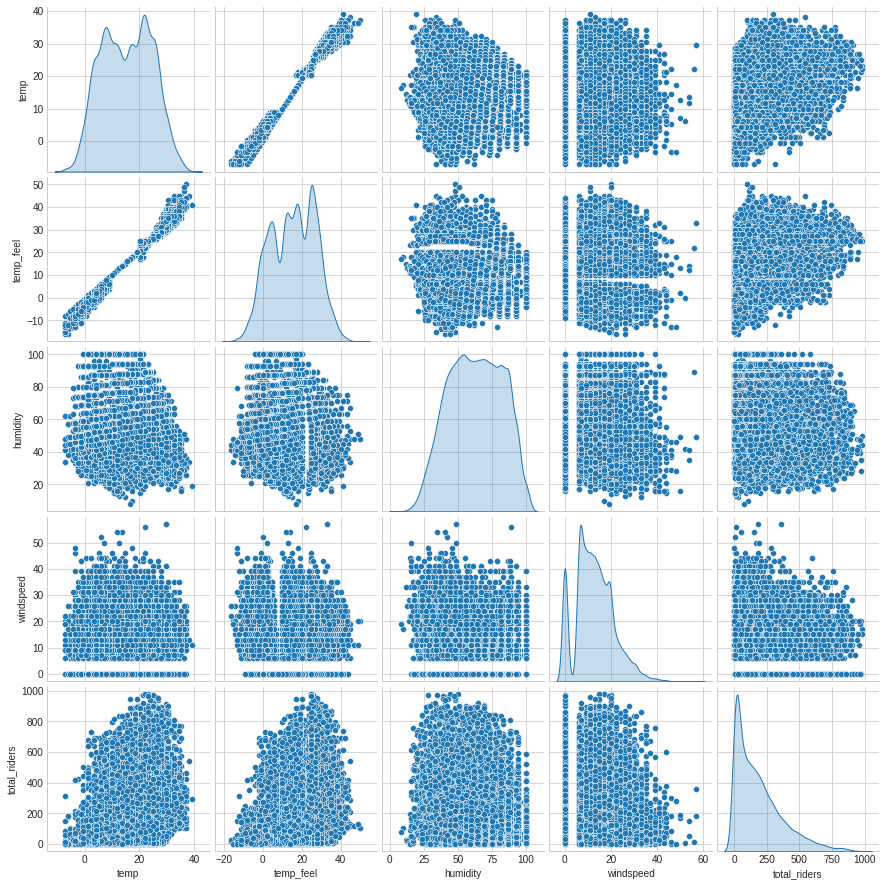

In [52]:
# Create a new dataframe of only numeric variables: !!not the dummy variables

bike_nums = hourly_core[['temp', 'temp_feel', 'humidity', 'windspeed', 'total_riders']]

sb.pairplot(bike_nums, diag_kind='kde')
plt.show()

In [53]:
bike_nums.head()

,temp,temp_feel,humidity,windspeed,total_riders
0,3.28,3.0014,81.0,0.0,16
1,2.34,1.9982,80.0,0.0,40
2,2.34,1.9982,80.0,0.0,32
3,3.28,3.0014,75.0,0.0,13
4,3.28,3.0014,75.0,0.0,1


In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn import model_selection
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import TimeSeriesSplit
import numpy as np 
from numpy import sqrt

import statsmodels.api as sm


In [55]:
hourly_core.dtypes

date_time         object
year               int64
month           category
hour               int64
is_holiday         int64
is_workday         int64
temp             float64
temp_feel        float64
humidity         float64
windspeed        float64
casual             int64
registered         int64
total_riders       int64
season_name     category
weekday_name    category
weather_desc    category
day                int64
dtype: object

In [56]:
hourly_dummies = hourly_core.copy()

In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = hourly_dummies[['year', 'day', 'hour',
       'is_holiday', 'is_workday', 'temp', 'temp_feel',
       'humidity', 'windspeed']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [58]:
vif

,VIF,features
0,38.410317,year
1,4.198956,day
2,4.191608,hour
3,1.101349,is_holiday
4,3.376617,is_workday
5,276.692567,temp
6,204.180814,temp_feel
7,13.706259,humidity
8,4.074190,windspeed


In [17]:
hourly_dummies = pd.get_dummies(hourly_dummies, drop_first=True)
hourly_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Columns: 17413 entries, year to weather_desc_inclement
dtypes: float64(4), int64(8), uint8(17401)
memory usage: 290.0 MB


In [59]:
hourly_dummies = pd.get_dummies(hourly_dummies, columns=['month', 'season_name', 'weekday_name', 'weather_desc'], drop_first=True)

# ??? Why do you drop the first one, what if you need it?

In [60]:
hourly_dummies.head()

,date_time,year,hour,is_holiday,is_workday,temp,temp_feel,humidity,windspeed,casual,...,season_name_winter,weekday_name_monday,weekday_name_saturday,weekday_name_sunday,weekday_name_thursday,weekday_name_tuesday,weekday_name_wednesday,weather_desc_crap,weather_desc_foggy,weather_desc_inclement
0,2011-01-01 00:00:00,2011,0,0,0,3.28,3.0014,81.0,0.0,3,...,1,0,1,0,0,0,0,0,0,0
1,2011-01-01 01:00:00,2011,1,0,0,2.34,1.9982,80.0,0.0,8,...,1,0,1,0,0,0,0,0,0,0
2,2011-01-01 02:00:00,2011,2,0,0,2.34,1.9982,80.0,0.0,5,...,1,0,1,0,0,0,0,0,0,0
3,2011-01-01 03:00:00,2011,3,0,0,3.28,3.0014,75.0,0.0,3,...,1,0,1,0,0,0,0,0,0,0
4,2011-01-01 04:00:00,2011,4,0,0,3.28,3.0014,75.0,0.0,0,...,1,0,1,0,0,0,0,0,0,0


In [61]:
hourly_dummies.shape

(17379, 36)

In [64]:
hourly_dummies = hourly_dummies.drop(columns=['date_time'])

In [65]:
hourly_dummies.dtypes

year                        int64
hour                        int64
is_holiday                  int64
is_workday                  int64
temp                      float64
temp_feel                 float64
humidity                  float64
windspeed                 float64
casual                      int64
registered                  int64
total_riders                int64
day                         int64
month_feb                   uint8
month_mar                   uint8
month_apr                   uint8
month_may                   uint8
month_jun                   uint8
month_jul                   uint8
month_aug                   uint8
month_sep                   uint8
month_oct                   uint8
month_nov                   uint8
month_dec                   uint8
season_name_spring          uint8
season_name_summer          uint8
season_name_winter          uint8
weekday_name_monday         uint8
weekday_name_saturday       uint8
weekday_name_sunday         uint8
weekday_name_t

In [66]:
# VIF code from above
variables = hourly_dummies
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns
vif

/home/jessica/anaconda3/envs/CABerlin/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF,features
0,1.098051,year
1,1.301508,hour
2,inf,is_holiday
3,inf,is_workday
4,85.367087,temp
5,76.671759,temp_feel
6,1.833029,humidity
7,1.276541,windspeed
8,inf,casual
9,inf,registered


In [67]:
correlations = hourly_dummies.corr(method='pearson', min_periods=1).round(3)
#correlations = correlations.unstack()
#correlations = correlations[abs(correlations) >= 0.7]
correlations['total_riders'].round(2)

year                      0.25
hour                      0.39
is_holiday               -0.03
is_workday                0.03
temp                      0.40
temp_feel                 0.40
humidity                 -0.33
windspeed                 0.09
casual                    0.70
registered                0.97
total_riders              1.00
day                      -0.00
month_feb                -0.12
month_mar                -0.06
month_apr                -0.00
month_may                 0.06
month_jun                 0.08
month_jul                 0.07
month_aug                 0.08
month_sep                 0.08
month_oct                 0.05
month_nov                -0.02
month_dec                -0.08
season_name_spring       -0.00
season_name_summer        0.15
season_name_winter       -0.23
weekday_name_monday      -0.01
weekday_name_saturday     0.00
weekday_name_sunday      -0.03
weekday_name_thursday     0.02
weekday_name_tuesday      0.00
weekday_name_wednesday    0.00
weather_

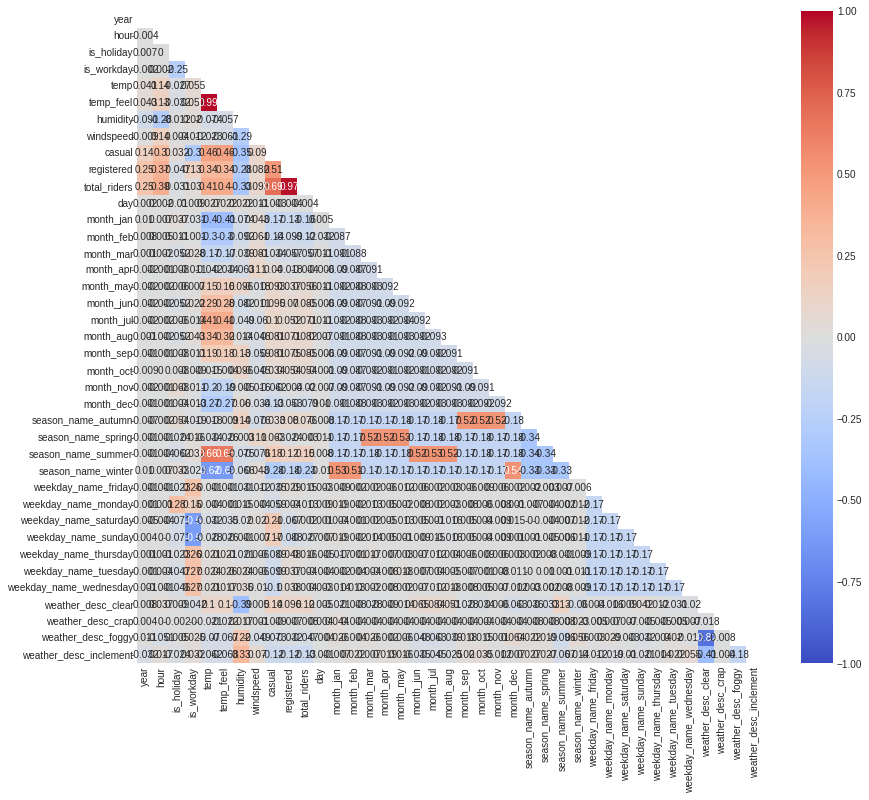

In [42]:
plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(correlations, dtype=bool))
heatmap = sb.heatmap(correlations, annot=True, linewidths=0, vmin=-1, vmax=1, center=0, cmap="coolwarm", mask=mask)
fig = heatmap.get_figure();